## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur eEngineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [3]:
df=pd.read_csv('apps.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9658,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df.shape

(9659, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [8]:
## summary of dataset 

df.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [9]:
## Missing Values

df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

## Insights and observation

The dataset has missing values 

In [10]:
df.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data Cleaning 

In [11]:
df['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307], shape=(5330,))

In [20]:
df['Reviews'].astype(int)

0          159
1          967
2        87510
3       215644
4          967
         ...  
9654        38
9655         4
9656         3
9657       114
9658    398307
Name: Reviews, Length: 9659, dtype: int64

In [14]:
df['Reviews'].astype(str).str.isnumeric().sum()


np.int64(9659)

In [19]:
df[~df['Reviews'].astype(str).str.isnumeric()]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [27]:
df_copy=df.copy()
df_copy = df_copy.drop(df_copy.index[-1])

df_copy[~df_copy['Reviews'].astype(str).str.isnumeric()]


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [28]:
## convet Reviews Datatype into integer 
df_copy['Reviews']=df_copy['Reviews'].astype(int)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9658 non-null   int64  
 1   App             9658 non-null   object 
 2   Category        9658 non-null   object 
 3   Rating          8195 non-null   float64
 4   Reviews         9658 non-null   int64  
 5   Size            8431 non-null   float64
 6   Installs        9658 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9658 non-null   object 
 9   Content Rating  9658 non-null   object 
 10  Genres          9658 non-null   object 
 11  Last Updated    9658 non-null   object 
 12  Current Ver     9650 non-null   object 
 13  Android Ver     9656 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [31]:
df_copy['Size'].unique()

array([ 19. ,  14. ,   8.7,  25. ,   2.8,   5.6,  29. ,  33. ,   3.1,
        28. ,  12. ,  20. ,  21. ,  37. ,   2.7,   5.5,  17. ,  39. ,
        31. ,   4.2,   7. ,  23. ,   6. ,   6.1,   4.6,   9.2,   5.2,
        11. ,  24. ,   nan,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,
         7.9,  56. ,  57. ,  35. ,  54. ,   0.2,   3.6,   5.7,   8.6,
         2.4,  27. ,   2.5,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,
        32. ,   5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,
         6.7,  30. ,   2.6,   7.1,   3.7,  22. ,   7.4,   6.4,   3.2,
         8.2,   9.9,   4.9,   9.5,   5. ,   5.9,  13. ,  73. ,   6.8,
         3.5,   4. ,   2.3,   7.2,   2.1,  42. ,   7.3,   9.1,  55. ,
         0. ,   6.5,   1.5,   7.5,  51. ,  41. ,  48. ,   8.5,  46. ,
         8.3,   4.3,   4.7,   3.3,  40. ,   7.8,   8.8,   6.6,   5.1,
        61. ,  66. ,   0.1,   8.4,  44. ,   0.7,   1.6,   6.2,  53. ,
         1.4,   3. ,   5.8,   3.8,   9.6,  45. ,  63. ,  49. ,  77. ,
         4.4,   4.8,

In [34]:
df_copy['Size'].isnull().sum()

np.int64(1227)

In [44]:
df_copy['Size']=df_copy['Size'].astype(str).str.replace('M','000')
df_copy['Size']=df_copy['Size'].astype(str).str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('nan',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [41]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9658 non-null   int64  
 1   App             9658 non-null   object 
 2   Category        9658 non-null   object 
 3   Rating          8195 non-null   float64
 4   Reviews         9658 non-null   int64  
 5   Size            8431 non-null   float64
 6   Installs        9658 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9658 non-null   object 
 9   Content Rating  9658 non-null   object 
 10  Genres          9658 non-null   object 
 11  Last Updated    9658 non-null   object 
 12  Current Ver     9650 non-null   object 
 13  Android Ver     9656 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [46]:
df_copy['Size']

0       19.0
1       14.0
2        8.7
3       25.0
4        2.8
        ... 
9653     9.6
9654    53.0
9655     3.6
9656     9.5
9657     NaN
Name: Size, Length: 9658, dtype: float64

In [ ]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [5]:
import pandas as pd

df = pd.read_csv('apps.csv')  
df_copy = df.copy()

chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')
        

In [6]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [7]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [8]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [9]:
## Handling Last update feature 

df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [11]:
pd.to_datetime(df_copy['Last Updated'])

0      2018-01-07
1      2018-01-15
2      2018-08-01
3      2018-06-08
4      2018-06-20
          ...    
9654   2017-07-25
9655   2018-07-06
9656   2017-01-20
9657   2015-01-19
9658   2018-07-25
Name: Last Updated, Length: 9659, dtype: datetime64[ns]

In [12]:
df_copy['Last Update']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Update'].dt.day
df_copy['Month']=df_copy['Last Update'].dt.month
df_copy['year']=df_copy['Last Update'].dt.year

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      9659 non-null   int64         
 1   App             9659 non-null   object        
 2   Category        9659 non-null   object        
 3   Rating          8196 non-null   float64       
 4   Reviews         9659 non-null   int64         
 5   Size            8432 non-null   float64       
 6   Installs        9659 non-null   int64         
 7   Type            9659 non-null   object        
 8   Price           9659 non-null   float64       
 9   Content Rating  9659 non-null   object        
 10  Genres          9659 non-null   object        
 11  Last Updated    9659 non-null   object        
 12  Current Ver     9651 non-null   object        
 13  Android Ver     9657 non-null   object        
 14  Last Update     9659 non-null   datetime64[ns]
 15  Day 

In [15]:
df_copy.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update,Day,Month,year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,20,6,2018


In [18]:
df_copy.to_csv('data/google_cleaned.csv')

## EDA 

#### EDA (Exploratory Data Analysis) is used to:

1. Understand the data – know what’s inside your dataset.

2. Find errors or missing values – clean the data.

3. See patterns and relationships – use charts and stats.

4. Prepare for modeling – choose the right methods.

👉 In short: EDA helps you understand and clean your data before analysis.









In [19]:
df_copy.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update,Day,Month,year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,20,6,2018


In [20]:
df.duplicated('App')

0       False
1       False
2       False
3       False
4       False
        ...  
9654    False
9655    False
9656    False
9657    False
9658    False
Length: 9659, dtype: bool

In [29]:
df[df.duplicated('App', keep=False)]



,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [32]:
df_copy[df.duplicated('App')].shape

(0, 18)

# Observation

The dataset has duplicate records

In [33]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')
df_copy.shape

(9659, 18)

# Explore Data

In [34]:
numeric_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype !='0']
categorical_features=[feature for frature in df_copy.columns if df_copy[feature].dtype=='0']


# Print columns

print('We have {} numerical features: {}'.format(len(numeric_feature),numeric_feature))
print('\nWe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

NameError: name 'feature' is not defined

In [35]:
numeric_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'object']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'object']

print('We have {} numerical features: {}'.format(len(numeric_feature), numeric_feature))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 10 numerical features: ['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Update', 'Day', 'Month', 'year']
We have 8 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


## Feature Information

1.App :- Name of the App

2.Category :- Category under which the App falls.

3.Rating :- Application's rating on playstore

4.Reviews :- Number of reviews of the App.

5.Size :- Size of the App.

6.Install :- Number of Installs of the App

7.Type :- If the App is free/paid

8.Price :- Price of the app (0 if it is Free)

9.Content Rating :- Appropriate Target Audience of the App.

10.Genres:- Genre under which the App falls.

11.Last Updated :- Date when the App was last updated

12.Current Ver :- Current Version of the Application

13.Android Ver :- Minimum Android Version required to run the App



In [ ]:
## Preparation of count data on categorical columns 

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('-----------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
Pixel Draw - Number Art Coloring Book                 0.010353
                                                        ...   
Sya9a Maroc - FR                                      0.010353
Fr. Mike Schmitz Audio Teachings                      0.010353
Parkinson Exercices FR                                0.010353
The SCP Foundation DB fr nn5n                         0.010353
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Name: proportion, Length: 9659, dtype: float64
-----------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.87203

In [41]:
## Preparation of count data on Numerical columns 


plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Feature', forntsize=10,fontheight='blod',alpha=0.8,y=1.)

for i in range(0,len(numeric_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_feature[i]],shade=True,color='r')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

AttributeError: 'Text' object has no property 'forntsize'

<Figure size 1500x1500 with 0 Axes>

C:\Users\chira\AppData\Local\Temp\ipykernel_22544\3524751619.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_feature[i]], shade=True, color='r')
C:\Users\chira\AppData\Local\Temp\ipykernel_22544\3524751619.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_feature[i]], shade=True, color='r')
C:\Users\chira\AppData\Local\Temp\ipykernel_22544\3524751619.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_feature[i]], shade=True, color='r')
C:\Users\chira\AppData\Local\Temp\ipykernel_22544\3524751619.py:10: FutureWarning: 

`shade` is now deprecated in favor of `

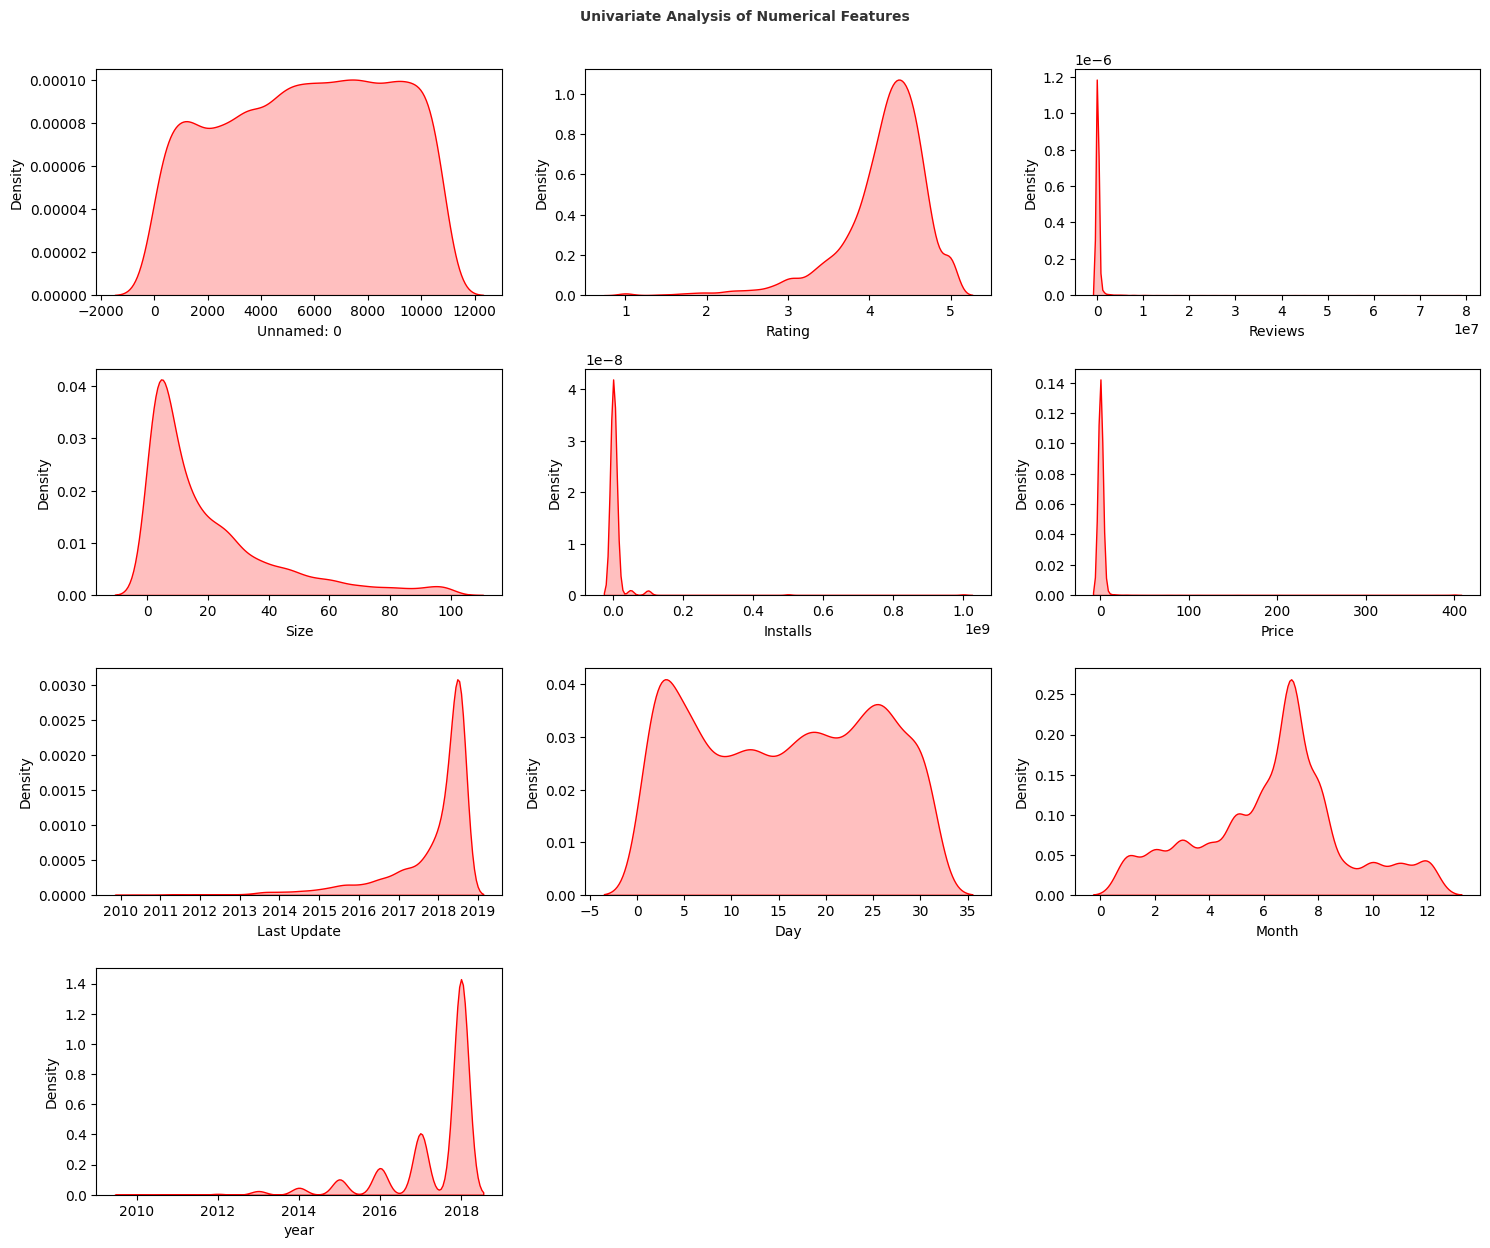

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparation of count data on Numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=10, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(x=df_copy[numeric_feature[i]], shade=True, color='r')
    plt.xlabel(numeric_feature[i])

plt.tight_layout()
plt.show()


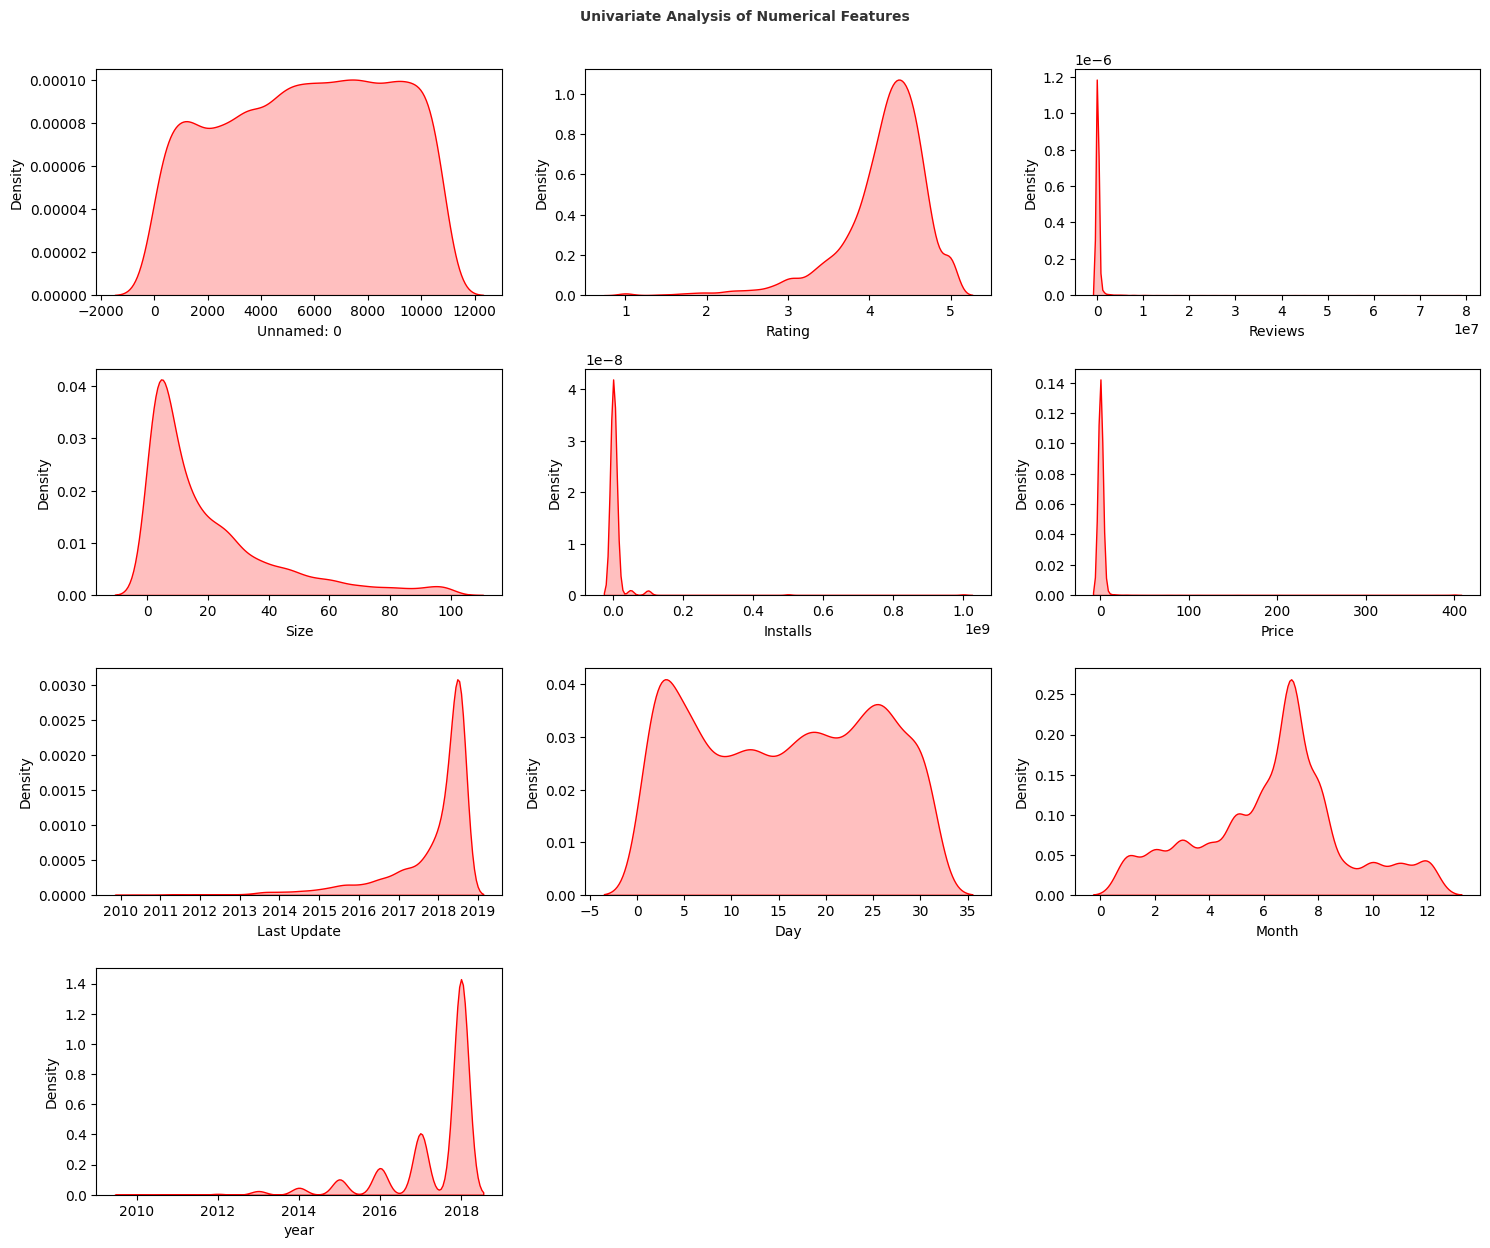

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparation of count data on Numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=10, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(x=df_copy[numeric_feature[i]], fill=True, color='r')

    plt.xlabel(numeric_feature[i])

plt.tight_layout()
plt.show()


## Observations
- Rating and Year is left skewed while Reviews,size,Installs and Price are right skewed 

C:\Users\chira\AppData\Local\Temp\ipykernel_22544\2483647198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]], palette="Set2")
C:\Users\chira\AppData\Local\Temp\ipykernel_22544\2483647198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]], palette="Set2")


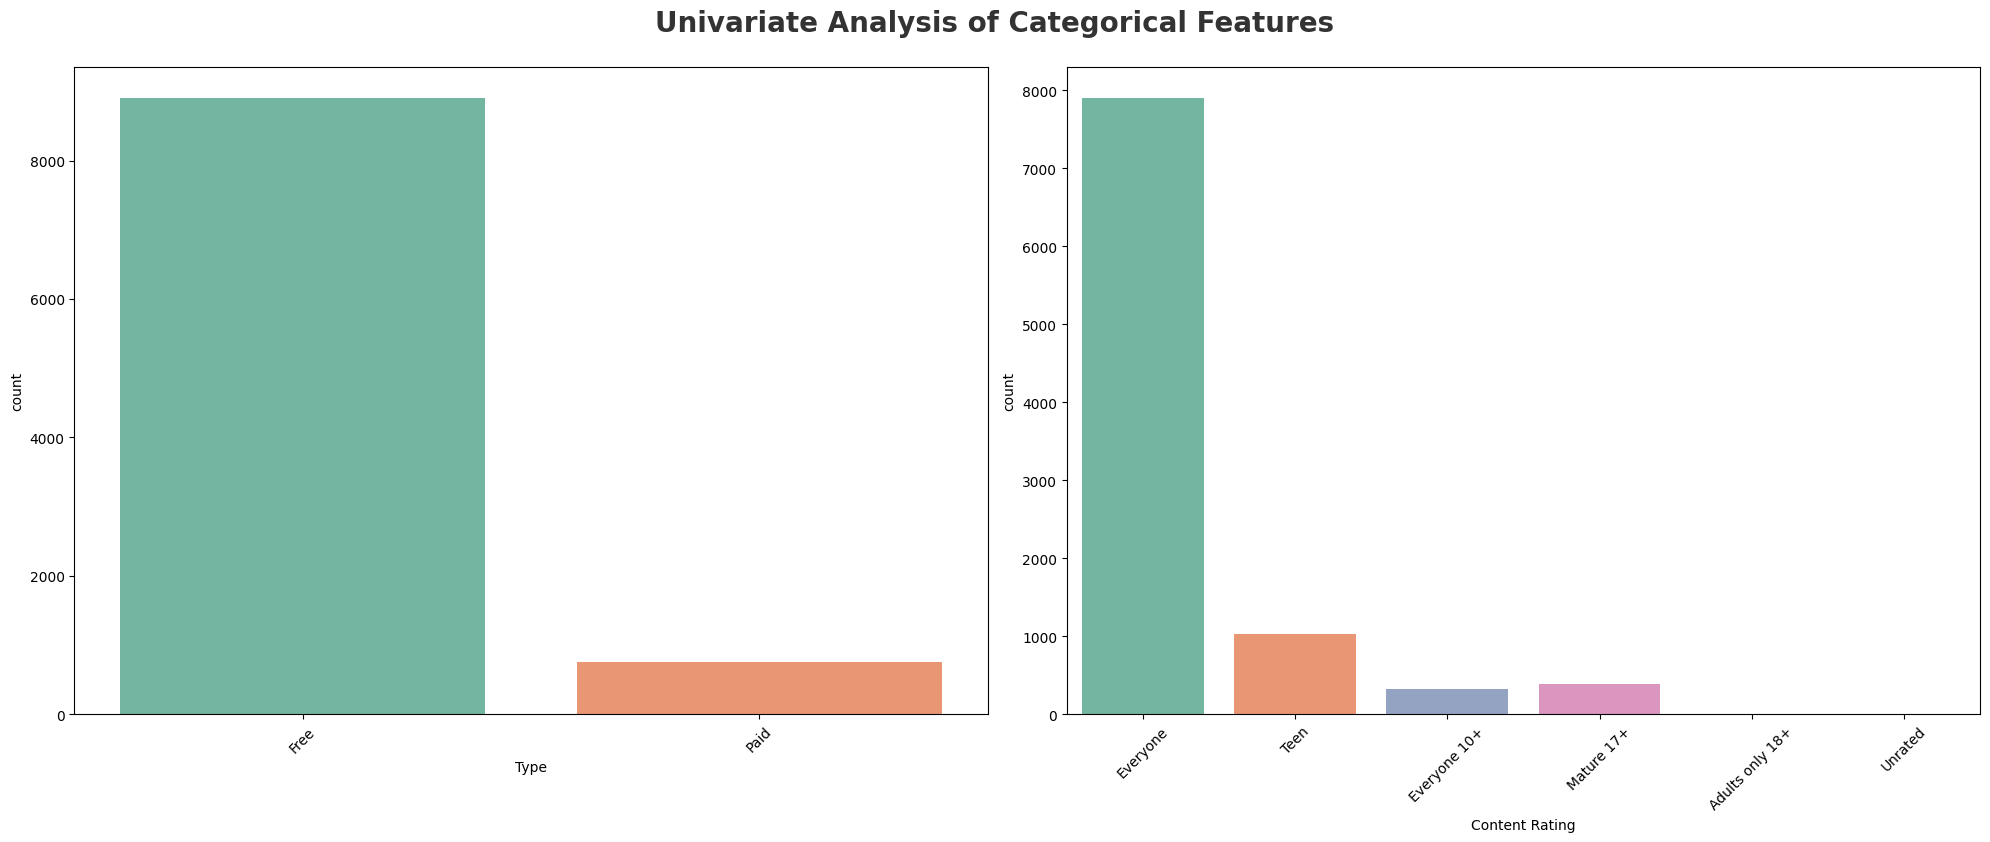

In [46]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
plt.tight_layout()

## Which is the most popular app category?

In [47]:
df_copy.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update,Day,Month,year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,15,1,2018


<Axes: ylabel='count'>

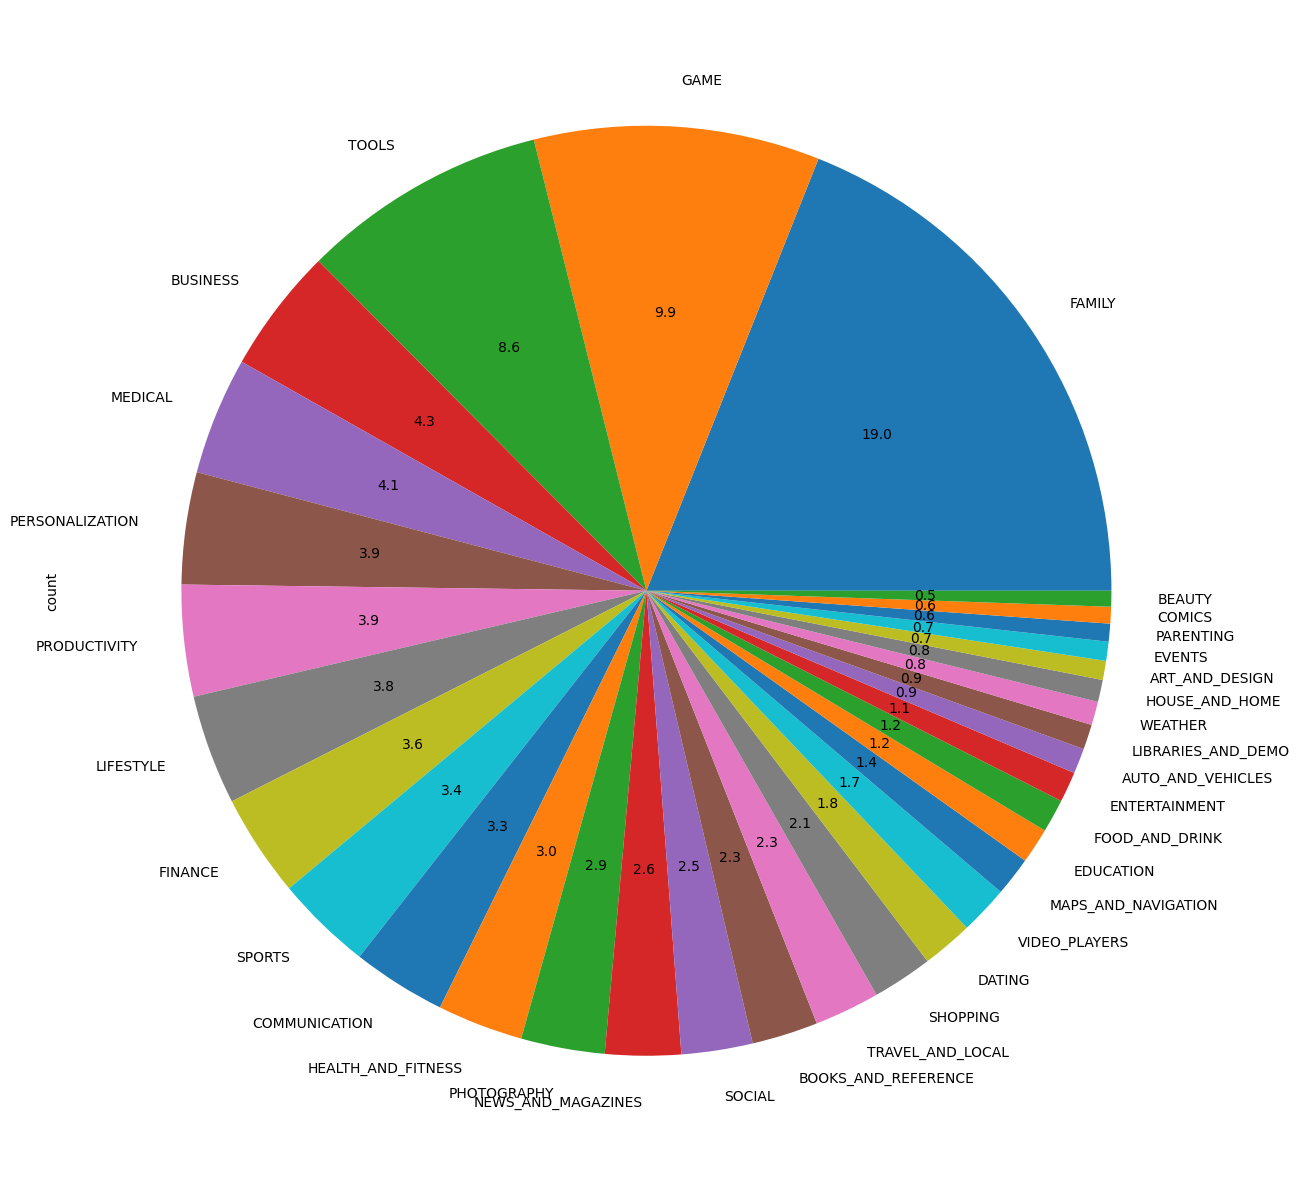

In [49]:
df_copy['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')

## Observation 

1.There are more kinds of apps in playstore which are undre category of family,games and tools 

2.Beatuty,comics,arts and weather kinds of apps are very less in playstore 

In [50]:
# Top 10 App Categories 

category=pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'category':'Count'},inplace=True)
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


C:\Users\chira\AppData\Local\Temp\ipykernel_22544\3427951943.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=top_categories[:10], palette='hls')


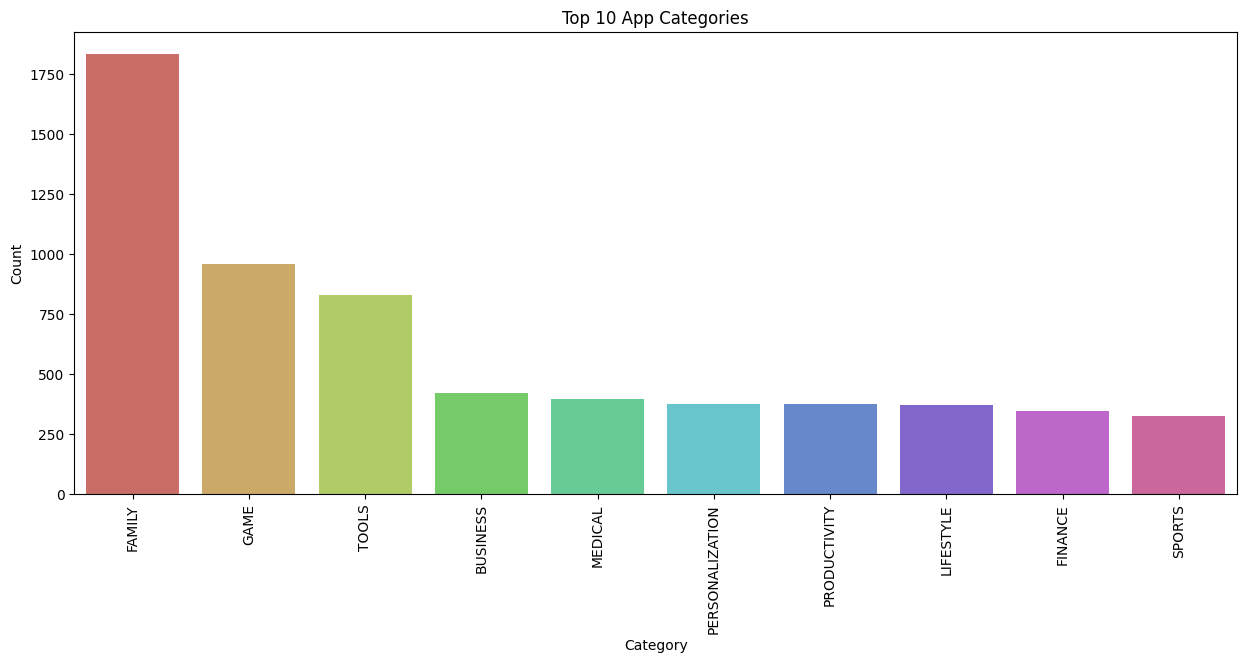

In [53]:
# Top 10 App Categories
top_categories = df['Category'].value_counts().reset_index()
top_categories.columns = ['Category', 'Count']

plt.figure(figsize=(15, 6))
sns.barplot(x='Category', y='Count', data=top_categories[:10], palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()


## Insights 

1.Family category has the modt number of apps with 18% of apps belonging to it,followed by Games category which has 11% of the apps.

2.Least number of apps belongs to the beauty category with then 1% of the total apps belonging to it.